In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [128]:
hpp = pd.read_csv("Boston Dataset.csv")
hpp

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [129]:
hpp.drop(columns='Unnamed: 0', axis=1, inplace = True)

In [130]:
hpp

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [131]:
hpp.shape

(506, 14)

In [132]:
hpp.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [133]:
hpp.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [135]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


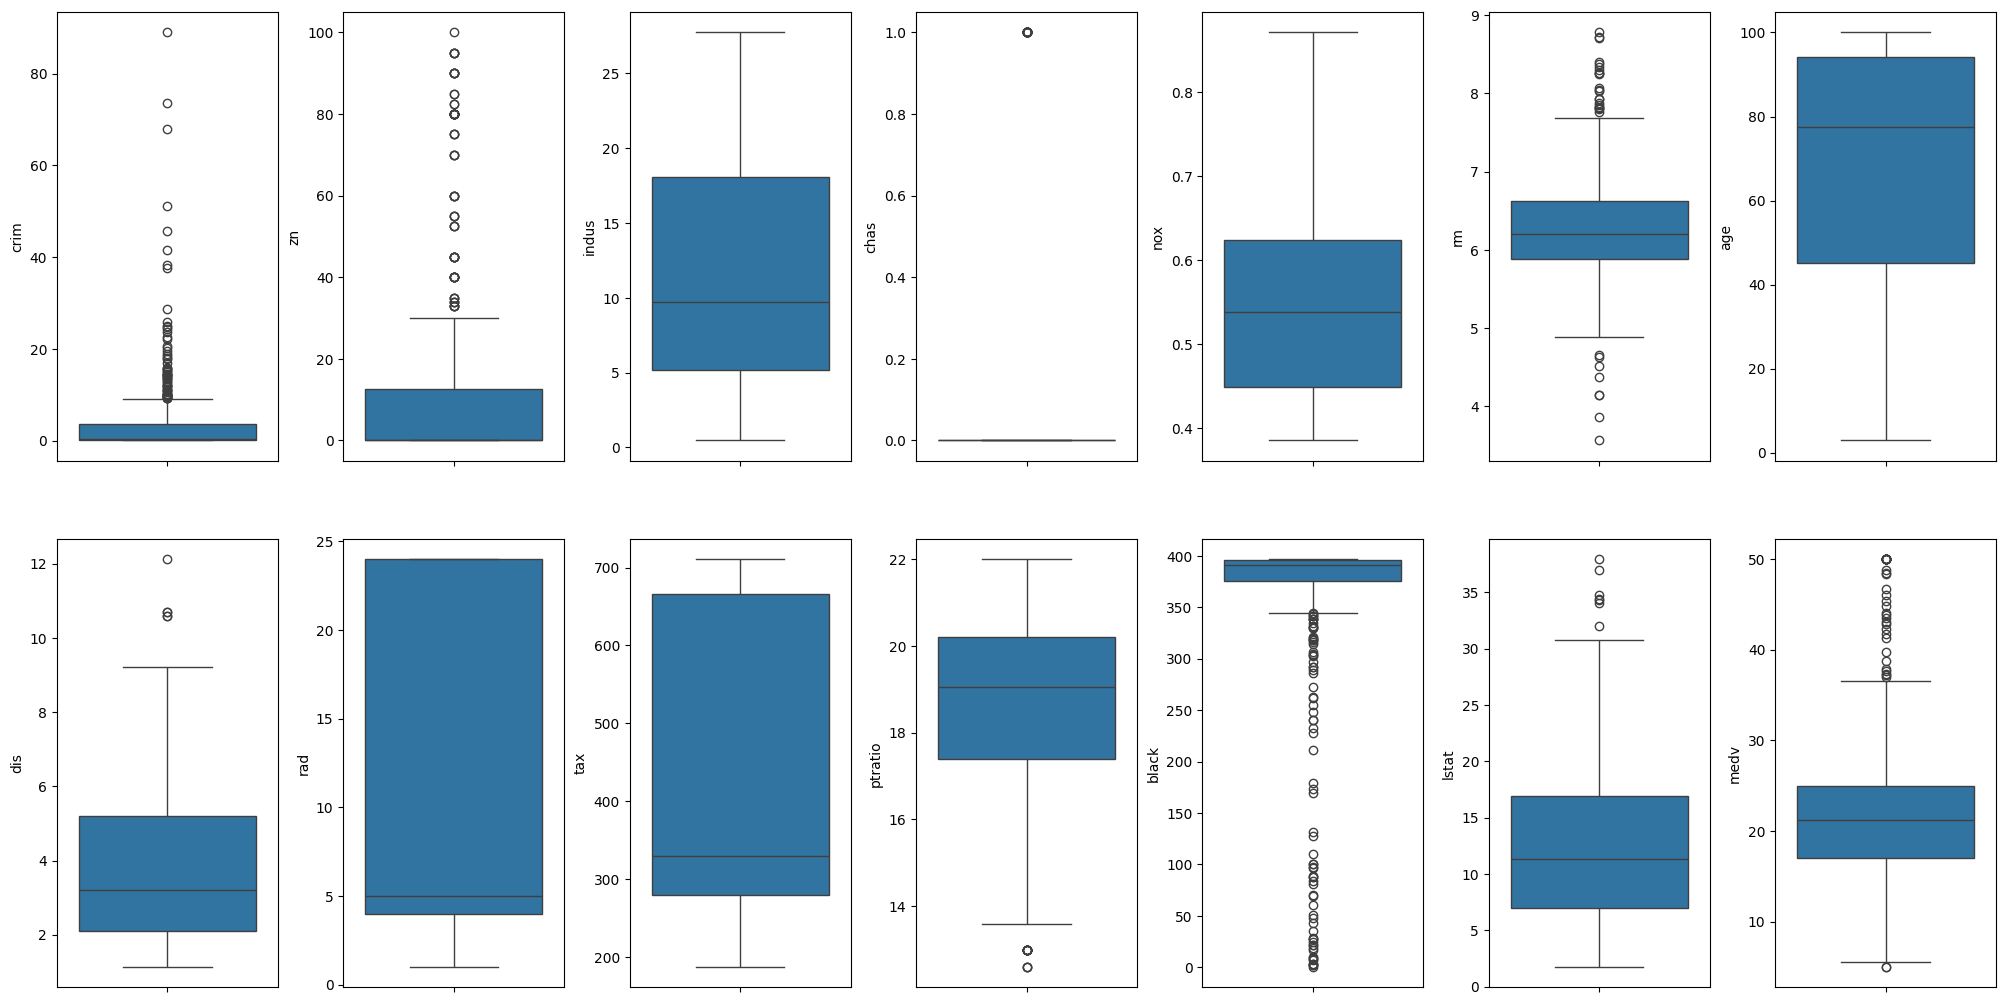

In [136]:
# create box plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in hpp.items():
    sns.boxplot(y=col, data=hpp, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [159]:
# REMOVING THE OUTLIERS FROM THE MULTIPLE COLUMNS
q1 = hpp["crim"].quantile(0.25)
q3 = hpp["crim"].quantile(0.75)
iqr = q3 - q1

In [161]:
q1, q3, iqr

(0.08204499999999999, 3.6770825, 3.5950375)

In [162]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

In [163]:
upper_limit

9.06963875

In [165]:
lower_limit

-5.31051125

In [169]:
# find the outliers
new_data = hpp.loc[(hpp['crim'] < upper_limit) & (hpp['crim'] > lower_limit)]

In [214]:
# removing the outliers for thr zn column
q11 = new_data['zn'].quantile(0.25)
q31 = new_data['zn'].quantile(0.75)
iqr1 = q31 - q11
q11, q31, iqr1

(0.0, 20.0, 20.0)

In [215]:
u_l = q31 + (1.5 * iqr1)
l_l = q11 - (1.5 * iqr1)
l_l, u_l

(-30.0, 50.0)

In [216]:
hpp = new_data.loc[(new_data['zn'] < u_l) & (new_data['zn'] > l_l)]

In [217]:
len(hpp)

395

In [218]:
len(new_data)

440

In [219]:
q12 = hpp['black'].quantile(0.25)
q32 = hpp['black'].quantile(0.75)
iqr2 = q32 - q12
q12, q32, iqr2

(377.675, 396.06, 18.38499999999999)

In [220]:
u_l2 = q32 + (1.5 * iqr2)
l_l2 = q12 - (1.5 * iqr2)
l_l2, u_l2

(350.0975, 423.6375)

In [222]:
hpp2 = hpp.loc[(hpp['black'] < u_l2) & (hpp['black'] > l_l2)]

In [268]:
q13 = hpp2['rm'].quantile(0.25)
q33 = hpp2['rm'].quantile(0.75)
iqr3 = q33 - q13
q13, q33, iqr3

(5.9334999999999996, 6.63075, 0.6972500000000004)

In [269]:
u_l3 = q33 + (1.5 * iqr3)
l_l3 = q13 - (1.5 * iqr3)
u_l3, l_l3

(7.6766250000000005, 4.887624999999999)

In [270]:
hpp3 = hpp2.loc[(hpp2['rm'] < u_l3) & (hpp2['rm'] > l_l3)]

In [289]:
q14 = hpp3['medv'].quantile(0.25)
q34 = hpp3['medv'].quantile(0.75)
iqr4 = q34 - q14
q14, q34, iqr4

(19.2, 25.0, 5.800000000000001)

In [291]:
u_l4 = q34 + (1.5 * iqr4)
l_l4 = q14 - (1.5 * iqr4)
u_l4, l_l4

(33.7, 10.499999999999998)

In [295]:
hpp4 = hpp3.loc[(hpp3['medv'] < u_l4) & (hpp3['medv'] > l_l4)]

In [321]:
x = hpp2.drop(columns="medv", axis=1)
y = hpp2['medv']

In [322]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [323]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 346, dtype: float64

In [324]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=2)

In [325]:
x_train.shape

(311, 13)

In [326]:
x_test.shape

(35, 13)

In [327]:
model = LinearRegression()

In [328]:
model.fit(x_train,y_train)

LinearRegression()

In [329]:
y_pred = model.predict(x_train)


In [330]:
score_1 = metrics.r2_score(y_train, y_pred)

score_2 = metrics.mean_absolute_error(y_train, y_pred)

In [331]:
score_1

0.7461162737287226

In [332]:
score_2

2.9514509618875544

In [333]:
y_test_pred = model.predict(x_test)

In [334]:
score_1 = metrics.r2_score(y_test, y_test_pred)

score_2 = metrics.mean_absolute_error(y_test, y_test_pred)

In [335]:
score_1

0.6693507669836045

In [336]:
score_2

2.6052195724618943

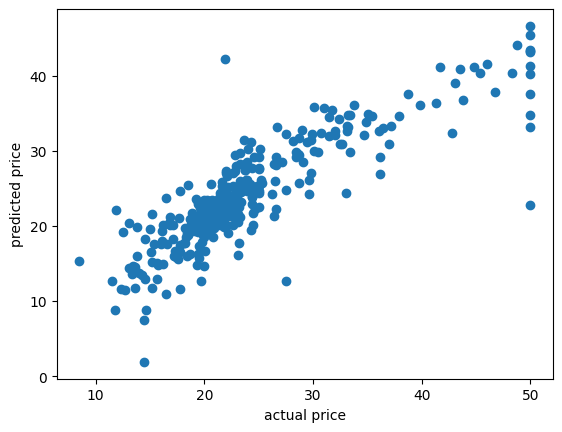

In [337]:
plt.scatter(y_train, y_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show()

In [338]:
test_predict = [0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43]

test_prenumpy = np.asarray(test_predict)
test1 = test_prenumpy.reshape(1, -1)

pred = model.predict(test1)
pred

C:\Users\Ajay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.00601716])

In [ ]:
# in the above example the model predicting the price was very close to the orginal price in the dataset given
# orginal was 22.9
# model predict was 23 